In [5]:
import pandas as pd 
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category,test_size=0.2,random_state=5)

In [9]:
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
len(X_train_count.toarray()[1])

7705

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_count)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



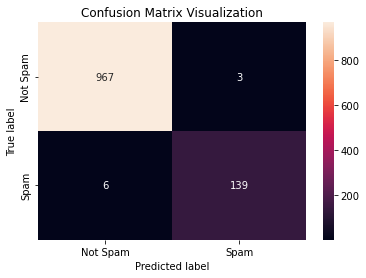

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=["Not Spam","Spam"],yticklabels=["Not Spam","Spam"])
plt.xlabel("Predicted label")
plt.ylabel('True label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [14]:
emails=[
    "Hey mohan, can we get together to watch football game tomorrow?",
    "Upto 20% discount on parking,exclusive offer just for you,Don't miss the reward!"
       ]
emails_count=v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [18]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('Vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

